### Patika Veri Bilimi & Veri Analitiği Ödev 1
Defne Öztürk

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns

## Ödev Sorusu 1: 
Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.

In [121]:
values = np.array([["Ankara", "Her zaman", "2", "0"], ["Izmir", "Bazen", "4", "100"], ["Istanbul", "Hic", "5", "67"]])

In [127]:
cols = ["nominal", "ordinal", "interval(degerlendime 1-5)", "ratio(basınc 0-...)"]

In [128]:
df = pd.DataFrame(data=values, columns=cols)
df.head()

,nominal,ordinal,interval(degerlendime 1-5),ratio(basınc 0-...)
0,Ankara,Her zaman,2,0
1,Izmir,Bazen,4,100
2,Istanbul,Hic,5,67


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [187]:
data = pd.read_csv("data.csv")

In [188]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Ödev Sorusu 2: 
Ekli data üzerindeki radius_mean, area_mean, compactness_mean kolonlarının count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım. 

In [189]:
data2 = data.loc[:,["radius_mean", "area_mean", "compactness_mean"]]
data2

,radius_mean,area_mean,compactness_mean
0,17.99,1001.0,0.27760
1,20.57,1326.0,0.07864
2,19.69,1203.0,0.15990
3,11.42,386.1,0.28390
4,20.29,1297.0,0.13280
...,...,...,...
564,21.56,1479.0,0.11590
565,20.13,1261.0,0.10340
566,16.60,858.1,0.10230
567,20.60,1265.0,0.27700


In [77]:
data2.describe()

,radius_mean,area_mean,compactness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.104341
std,3.524049,351.914129,0.052813
min,6.981000,143.500000,0.019380
25%,11.700000,420.300000,0.064920
50%,13.370000,551.100000,0.092630
75%,15.780000,782.700000,0.130400
max,28.110000,2501.000000,0.345400


In [78]:
def outliers(kolon):
    q1=data2[kolon].quantile(q=0.25)
    q3=data2[kolon].quantile(q=0.75)
    IQR=q3-q1
    o1=q1-(1.5*IQR)
    o2=q3+(1.5*IQR)
    return o1,o2

In [80]:
outliers("radius_mean")

(5.579999999999999, 21.9)

In [81]:
outliers("area_mean")

(-123.30000000000001, 1326.3000000000002)

In [82]:
outliers("compactness_mean")


(-0.03329999999999997, 0.22861999999999996)

In [135]:
def upperloweroutlier(kolon):
    lower = (data2[kolon]<float((outliers(kolon)[0]))).sum()
    upper = (data2[kolon]>float((outliers(kolon)[1]))).sum()
    return lower, upper

In [136]:
upperloweroutlier("radius_mean")

(0, 14)

In [137]:
upperloweroutlier("area_mean")

(0, 25)

In [138]:
upperloweroutlier("compactness_mean")

(0, 16)

<AxesSubplot:xlabel='radius_mean'>

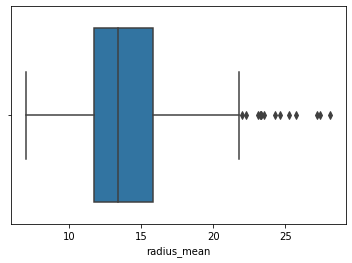

In [140]:
sns.boxplot(x=data2["radius_mean"])

<AxesSubplot:xlabel='area_mean'>

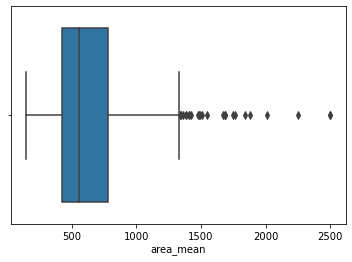

In [142]:
sns.boxplot(x=data2["area_mean"])

<AxesSubplot:xlabel='compactness_mean'>

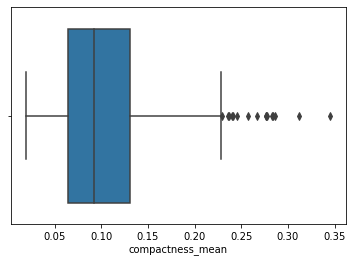

In [143]:
sns.boxplot(x=data2["compactness_mean"])

#### "radius_mean" ortalaması 14.127, medyanı 13.370, standart sapması 3.524, 14 upper outliers
#### "area_mean" ortalaması 654.889, medyanı 551.100, standart sapması 351.914, 25 upper outliers
#### "compactness_mean" ortalaması 0.104, medyanı 0.093, standart sapması 0.053, 16 upper outliers

* "radius_mean" medyan ortalamadan daha küçük bu upper outlierlardan kaynaklanıyor olabilir. Veride standart sapma çok fazla değil bunun nedeni verideki max ve min değerler ortalama değere çokta uzak değil.

* "area_mean" medyan ortalamadan daha küçük bu upper outlierlardan kaynaklanıyor olabilir. Veride standart sapma çok fazla bunun nedeni veride min ve max değerleri birbirlerine ve ortalamaya uzak.

* "compactness_mean" medyan ortalamadan daha küçük bu upper outlierlardan kaynaklanıyor olabilir. Veride standart sapma çok fazla değil bunun nedeni verideki max ve min değerler arasında çok fark olmamakla beraber ortalama değere de uzak değiller.

* "radius_mean", "area_mean", "compactness_mean" kolonlarında IQR methodu ile outlierlar hesaplandığında lower outlier hiçbirinde bulunmazken, upper outlier hepsinde bulunmaktadır. "area_mean" en çok outlier bulunan kolondur. Standart sapma en fazla olan ve medyan ortalama arasındaki farkta en fazla olan kolondur. Bunun nedeni 25 tane outlier bulunmasından kaynaklanıyor olabilir.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Ödev Sorusu 3: 
Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.

In [147]:
data2.corr(method='pearson')

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


In [148]:
data2.corr(method='spearman')

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.999602,0.497578
area_mean,0.999602,1.000000,0.488988
compactness_mean,0.497578,0.488988,1.000000


In [190]:
data2.cov()

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


In [177]:
def effect_size (kolon1, kolon2):
    m1_m2=(data2[kolon1].describe()[1])-(data2[kolon2].describe()[1])
    s1=(((data2[kolon1].describe()[0])-1)*((data2[kolon1].describe()[2])**2))+(((data2[kolon2].describe()[0])-1)*((data2[kolon2].describe()[2])**2))
    s=np.sqrt((s1)/((data2[kolon1].describe()[0])+(data2[kolon2].describe()[0])-2))
    return m1_m2/s

In [178]:
effect_size("radius_mean","compactness_mean")

5.6268291122285605

In [179]:
effect_size("area_mean","compactness_mean")

2.6313393087695887

In [180]:
effect_size("area_mean","radius_mean")

2.5748571535813967

* "area_mean" ve "radius_mean" arasında güçlü bir korelasyon olduğunu söyleyebiliriz (değer 1'e çok yakın). Bu iki kolon arasında 0.99 değeri ile spearman korelasyonu, 0.98'le pearson korelasyonu olduğundan hem yüksek bir lineer korelasyon olduğunu hem de yüksek monotonic ilişkinin olduğunu  söyleyebiliriz.

* Pearson coefficient aykırı değerlerden etkileniyor.
* Spearman coefficient değerleri genellikle pearson coefficient değerlerinden daha yüksek çıkmalı. Bizim tablomuzda "area_mean", "compactness_mean" ve "radius_mean", "compactness_mean" aralarında pearson coefficient spearman coefficienttan daha yüksek. Bunun nedeni aradaki ilişkinin doğrusal olmamasından ya da aykırı değerlerden kaynaklanıyor olabilir.

* "area_mean","radius_mean"Effect size 0'a ne kadar yakınsa o iki grubun daha çok benzediğini göstermektedir. Burada "area_mean" ve "radius_mean" gruplarının en çok benzediğini, "area_mean" ve "compactness_mean" gruplarının daha az benzediğini ve "radius_mean" ve "compactness_mean" gruplarının ise diğer iki grup karşılaştırmalarına göre en az benzeyen ikili grup olduğunu söyleyebiliriz.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Ödev Sorusu 4: 
Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.

* Bir laboratuvar sonucu düşünüldüğünde, pozitif ve negatif çıkma olasılığının aynı zamanda seçilen laboratuvarın test sonuçlarının doğruluk olasılığıyla da alakalı olması.
* Buz dolabından seçilecek malzemelerle yapılacak yemeğin malzemesi olarak biber kullanılacağı bilindiğine göre, yemeğin menemen olma olasılığı.
* Gidilecek tatil yerinin karadeniz bölgesinde olduğu bilinirse, bu yerin Zonguldak olma olasılığı.
* Bir bootcampte ödül için seçilen 1. kişinin kız olduğu bilindiğine göre, ikinci kişinin Defne olma olasılığı.
* İki tane kalemlik olduğunu düşünelim birincisinde 10 kırmızı 5 siyah kalem, ikincisinde 6 kırmızı 9 siyah kalem varsa, alınacak kalemin birinci kalemlikten seçilip siyah olma olasılığı. 

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Ödev Sorusu 5: 
Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.

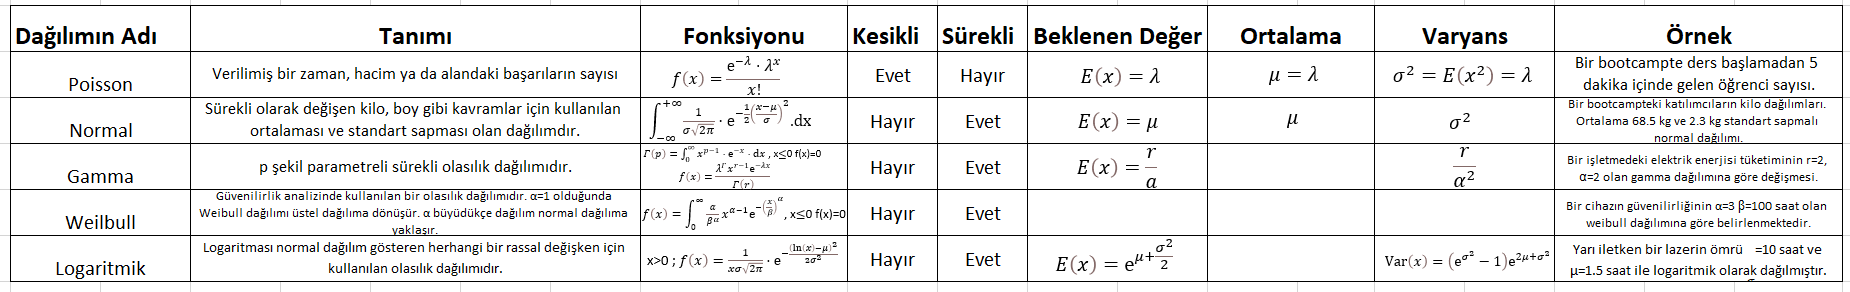

### --------------------------------------------------------------------------------------------------------------------------------------------------------------